<a href="https://colab.research.google.com/github/GENNYB7/RecreateGraph/blob/main/Recreating_Mortgage_Graph_Part1_%26_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [13]:
mortgages = pd.read_csv('/content/drive/MyDrive/Coding_Dojo/PandasForDataManipulation/mortgages.csv')
mortgages.head()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03


In [14]:
mortgages.describe()

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Interest Rate
count,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,150.500000,233244.608139,2265.486667,783.991750,1481.494917,231763.113222,0.040000
std,99.544421,114887.600674,540.507327,450.838445,654.272215,115306.391990,0.010005
min,1.000000,1677.040000,1686.420000,4.190000,480.630000,-7.170000,0.030000
25%,68.000000,139742.220000,1686.420000,426.787500,914.170000,137885.062500,0.030000
50%,135.500000,249413.115000,2147.290000,761.580000,1392.465000,247956.530000,0.040000
75%,225.250000,335027.117500,2762.330000,1085.610000,1967.187500,333740.135000,0.050000
max,360.000000,400000.000000,3163.170000,1666.660000,3150.050000,399519.370000,0.050000


In [15]:
mortgages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Month             1080 non-null   int64  
 1   Starting Balance  1080 non-null   float64
 2   Repayment         1080 non-null   float64
 3   Interest Paid     1080 non-null   float64
 4   Principal Paid    1080 non-null   float64
 5   New Balance       1080 non-null   float64
 6   Mortgage Name     1080 non-null   object 
 7   Interest Rate     1080 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 67.6+ KB


In [16]:
month_filter = mortgages['Month']>=1
mortgages[month_filter]

,Month,Starting Balance,Repayment,Interest Paid,Principal Paid,New Balance,Mortgage Name,Interest Rate
0,1,400000.00,1686.42,1000.00,686.42,399313.58,30 Year,0.03
1,2,399313.58,1686.42,998.28,688.14,398625.44,30 Year,0.03
2,3,398625.44,1686.42,996.56,689.86,397935.58,30 Year,0.03
3,4,397935.58,1686.42,994.83,691.59,397243.99,30 Year,0.03
4,5,397243.99,1686.42,993.10,693.32,396550.67,30 Year,0.03
...,...,...,...,...,...,...,...,...
1075,176,15619.91,3163.17,65.08,3098.09,12521.82,15 Year,0.05
1076,177,12521.82,3163.17,52.17,3111.00,9410.82,15 Year,0.05
1077,178,9410.82,3163.17,39.21,3123.96,6286.86,15 Year,0.05
1078,179,6286.86,3163.17,26.19,3136.98,3149.88,15 Year,0.05


In [ ]:
years_filter = mortgages['Mortgage Name']== '30 Year'
years_filter

In [52]:
mortgages = mortgages[years_filter]

In [56]:
rate3 = mortgages['Interest Rate']==0.03
rate5 = mortgages['Interest Rate']==0.05

mortgages3 = mortgages[rate3]

In [ ]:
mortgages3.info()

In [ ]:
mortgages5 = mortgages[rate5]
mortgages5.info()

In [ ]:
mortgages3[]

In [87]:
y=mortgages3["Interest Paid"].cumsum()
y

0        1000.00
1        1998.28
2        2994.84
3        3989.67
4        4982.77
         ...    
355    207064.13
356    207080.87
357    207093.44
358    207101.82
359    207106.01
Name: Interest Paid, Length: 360, dtype: float64

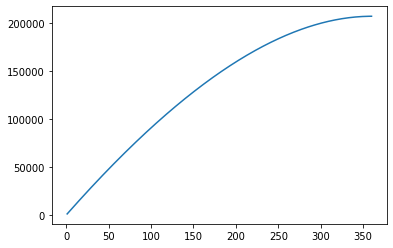

In [89]:
plt.plot(mortgages3["Month"], y);

In [85]:
y1=mortgages5['Interest Paid'].cumsum()
y1

360      1666.66
361      3331.32
362      4993.97
363      6654.60
364      8313.20
         ...    
715    372928.64
716    372964.02
717    372990.60
718    373008.35
719    373017.23
Name: Interest Paid, Length: 360, dtype: float64

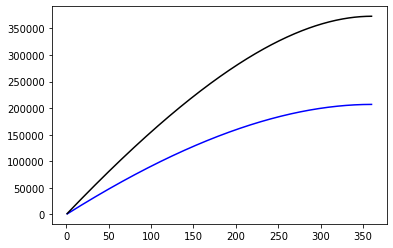

In [109]:
plt.plot(mortgages3["Month"], y, c= 'b'),
plt.plot(mortgages5["Month"], y1, c= 'k');

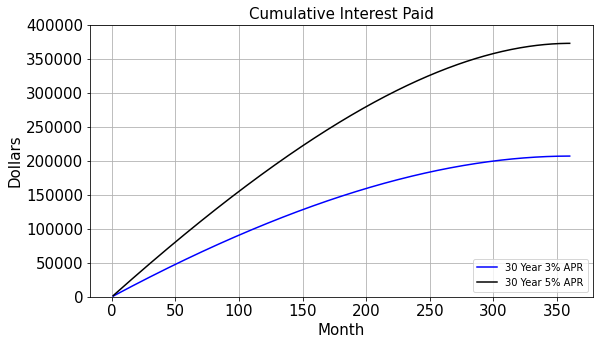

In [128]:
plt.figure(figsize=(9, 5))
plt.plot(mortgages3["Month"], y, c= 'b', label = "30 Year 3% APR"),
plt.plot(mortgages5["Month"], y1, c= 'k', label = "30 Year 5% APR");
plt.grid()
plt.ylim(bottom=0,top=400000)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Dollars', fontsize= 15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Cumulative Interest Paid', fontsize = 15)
plt.legend(loc="lower right");